In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sudoku/sudoku-puzzle-863979.jpg
/kaggle/input/skin-tone/face-skin-tone-examples.jpg
/kaggle/input/blob-pic/detect_blob.png
/kaggle/input/opencvlogo/opencv-logo.png
/kaggle/input/tomato/tomato.jpg
/kaggle/input/hands/offset_1062418.jpg
/kaggle/input/skin-tone-pic/skin_tone.jpg
/kaggle/input/face-detection/selfie.jpg
/kaggle/input/face-detection/face_template.jpg
/kaggle/input/sudoku-pic/sudoku.png
/kaggle/input/frontal-face/haarcascade_frontalface_default.xml
/kaggle/input/face-template/face_template.jpg
/kaggle/input/magnus/magnus.jpg
/kaggle/input/magnus/magnus_template.jpg


In [2]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

plt.rc('figure', 
      figsize=(10, 10),
      autolayout=True)

%matplotlib inline

# Thresholding

### Binary Thresholding

<font size='4'> We will start with Binary Thresholding that classifies pixels depending if they are above a certain threshold value. </font>

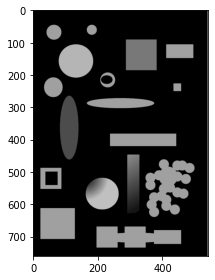

In [3]:
img = cv2.imread('../input/blob-pic/detect_blob.png', 0)
plt.imshow(img, cmap='gray')

<font size="4"> Now, we will change pixels to white if it is above a certain threshold:  </font> 

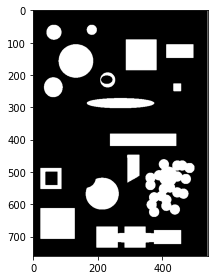

In [4]:
height, width = img.shape[:2]
thresh = 85

zeros = np.zeros([height, width, 1], 'uint8')

for h in range(height):
    for w in range(width):
        if img[h][w] >= thresh:
            zeros[h][w] = 255

plt.imshow(zeros, cmap='Greys_r')

<font size='4'> Note that the later image don't show the oval shaped object near the left edge anymore and some objects are truncated as they couldn't pass the threshold value.  </font>

<font size ='4'> Let's now use **cv2.threshold** to apply binary detection:</font>

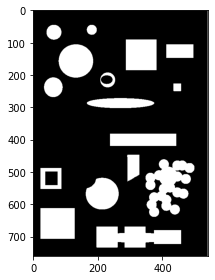

In [5]:
ret, binary = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)

plt.imshow(binary, cmap='gray')

### Adaptive Thresholding



<font size='4'> Binary thresholding fails to give a proper result under certain lighting conditions. On the other hand, adaptive thresholding considers a smaller segment of an image and sets a threshold for the neighbouring pixels, which makes him more indifferent to shadowing and lighting. </font>

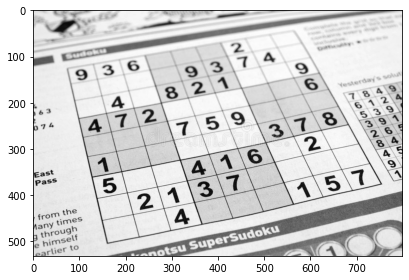

In [6]:
img = cv2.imread(r'../input/sudoku/sudoku-puzzle-863979.jpg')

# note that adaptive threshold requires a grayscale image
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap='gray');

<font size='4'> Let's now compare binary and adaptive thresholding: </font>

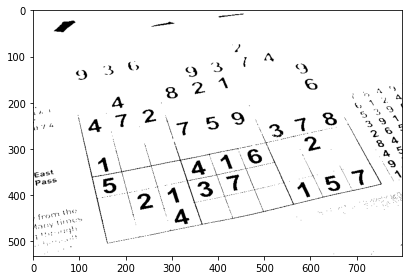

In [7]:
# Binary
ret, binary_sudoku = cv2.threshold(img, 70, 255, cv2.THRESH_BINARY)
plt.imshow(binary_sudoku, cmap='gray');

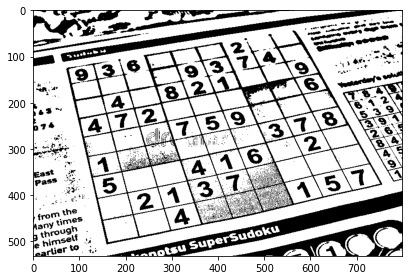

In [8]:
adaptive_sudoku = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
plt.imshow(adaptive_sudoku, cmap='gray')

### Skin Detection

<font size='4'> Let's first perform an HSV split to decide what combinations of channels we need to distinguish skin colors </font>

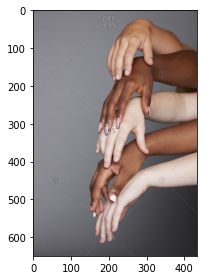

In [9]:
skin = cv2.imread('../input/hands/offset_1062418.jpg')
skin = cv2.cvtColor(skin, cv2.COLOR_BGR2RGB)

plt.imshow(skin)

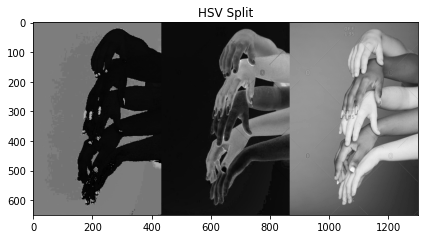

In [10]:
hsv = cv2.cvtColor(skin, cv2.COLOR_RGB2HSV)

hsv_split = np.concatenate([hsv[:, :, i] for i in range(3)], axis=1)

fig, ax = plt.subplots()
ax.set_title('HSV Split')

ax = plt.imshow(hsv_split, cmap='gray')

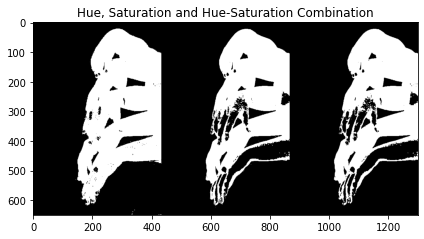

In [11]:
ret, h_wise = cv2.threshold(hsv[:, :, 0], 15, 255, cv2.THRESH_BINARY_INV)
ret, s_wise = cv2.threshold(hsv[:, :, 1], 40, 255, cv2.THRESH_BINARY)
h_s_comb = cv2.bitwise_and(h_wise, s_wise)

fig, ax = plt.subplots()
ax.set_title('Hue, Saturation and Hue-Saturation Combination')

final = np.concatenate([h_wise, s_wise, h_s_comb], axis=1)
plt.imshow(final, cmap='gray')

# Contour Object Detection

<font size='4'> Contours are basically continuous curves joining points that have similar color and intensity. Let's call the blob picture again by applying adaptive threshold to try to recognize different object on the picture </font>

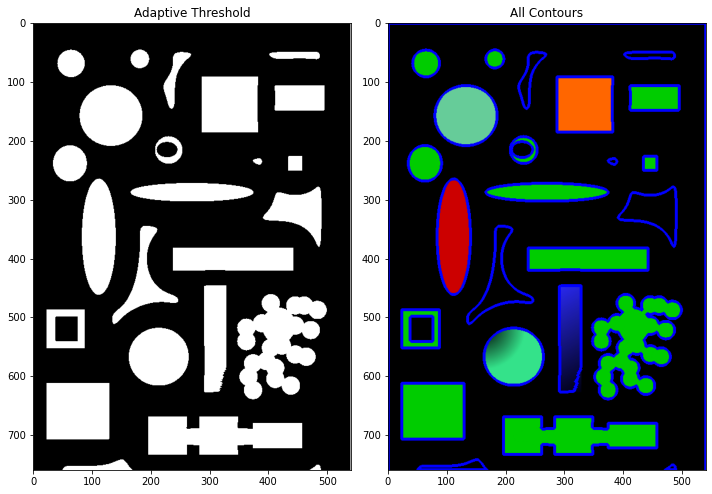

In [12]:
img = cv2.imread('../input/blob-pic/detect_blob.png')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

blob_adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)

contours, hierarchy =  cv2.findContours(blob_adaptive, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

index = -1 # draw all contours
color = (0, 0, 255) # set contour boundary color to be blue 
thickness = 4 # min thickness of contours

img2 = img.copy()
all_contours = cv2.drawContours(img2, contours, index, color, thickness)

fig = plt.figure(figsize=(10,10))

a= [[blob_adaptive, 'Adaptive Threshold'], [all_contours, 'All Contours']]
for i in range(2):
    ax1 = fig.add_subplot(1,2,i+1)
    ax1.set(title=a[i][1])
    plt.imshow(a[i][0], cmap='gray')

<font size='4'> Let's now find the areas, centroids and perimeters of the contours we have just found: </font>

Contour 1 -- Area: 86.5, Perimeter: 45.55634891986847
Contour 2 -- Area: 959.5, Perimeter: 251.8406196832657
Contour 3 -- Area: 13091.5, Perimeter: 754.0416301488876
Contour 4 -- Area: 10069.5, Perimeter: 401.41421353816986
Contour 5 -- Area: 7780.0, Perimeter: 329.22034430503845
Contour 6 -- Area: 4160.0, Perimeter: 258.0
Contour 7 -- Area: 1672.0, Perimeter: 160.48528122901917
Contour 8 -- Area: 14515.0, Perimeter: 1225.768675327301
Contour 9 -- Area: 6357.0, Perimeter: 446.9116872549057
Contour 10 -- Area: 7718.0, Perimeter: 484.8284270763397
Contour 11 -- Area: 4592.5, Perimeter: 502.0315263271332
Contour 12 -- Area: 5014.0, Perimeter: 357.2792183160782
Contour 13 -- Area: 5019.0, Perimeter: 444.3675308227539
Contour 14 -- Area: 8829.0, Perimeter: 450.5929263830185
Contour 15 -- Area: 108.0, Perimeter: 41.79898953437805
Contour 16 -- Area: 551.5, Perimeter: 93.41421353816986
Contour 17 -- Area: 2707.5, Perimeter: 194.75230765342712
Contour 18 -- Area: 1644.5, Perimeter: 152.1248904

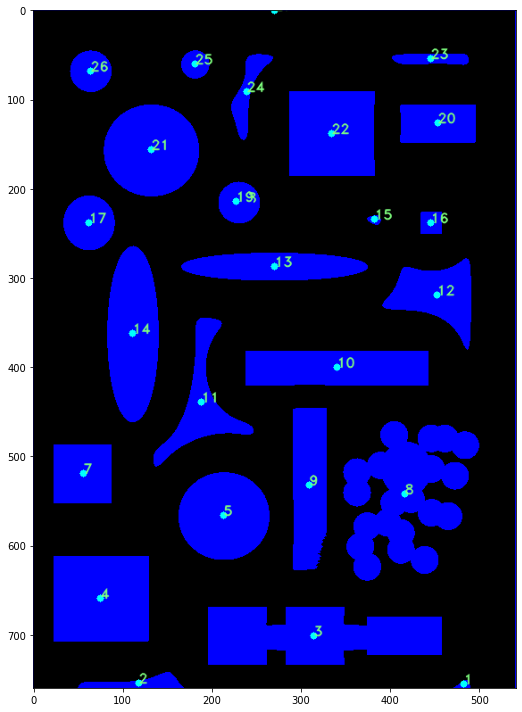

In [13]:
objects = np.zeros([img.shape[0], img.shape[1], 3], 'uint8')

i = 1
for c in contours:
    filled_contours = cv2.drawContours(objects, [c], -1, color, -1)
    Area = cv2.contourArea(c)
    Perimeter = cv2.arcLength(c, True)
    
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    
    TEXT_FACE = cv2.FONT_HERSHEY_DUPLEX
    TEXT_SCALE = 0.5
    TEXT_THICKNESS = 1
    TEXT = "0"
    cv2.circle(objects, (cx, cy), 4, (0,255,255), -1)
    cv2.putText(objects, f'{i}', (cx, cy), TEXT_FACE, TEXT_SCALE, (127,255,127), TEXT_THICKNESS, cv2.LINE_AA)
    print(f'Contour {i} -- Area: {Area}, Perimeter: {Perimeter}')
    i += 1
    
plt.subplots(figsize=(14, 10))    
plt.imshow(filled_contours);

### Canny Edge Detection


<font size='4'> Another big downside of simple threshold is that it tends to combine several contours as simple threshold lacks to detect wide variaties of edges. We will now compare binary threshold with canny edge detection to see this remarkable difference. </font>

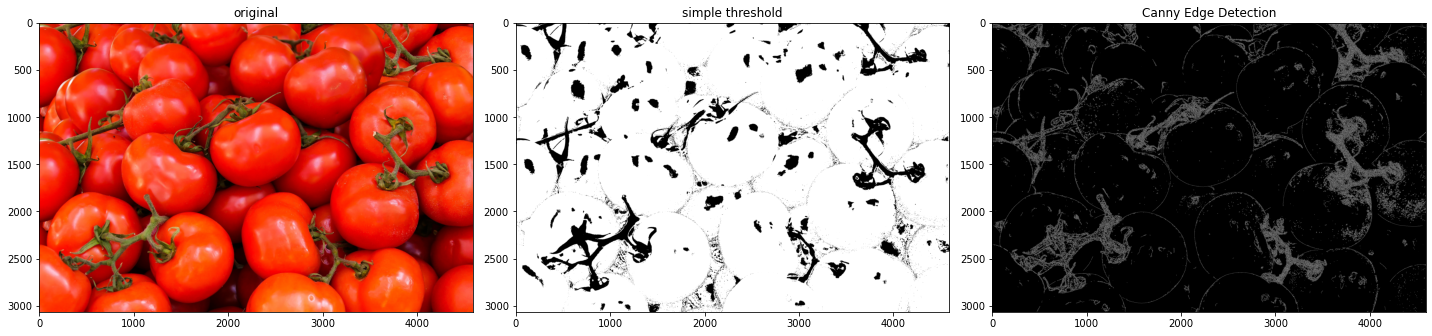

In [14]:
tomato = cv2.imread('../input/tomato/tomato.jpg')
tomato = cv2.cvtColor(tomato, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(tomato, cv2.COLOR_RGB2HSV)

ret, simple = cv2.threshold(hsv[:,:,0],15,225, cv2.THRESH_BINARY_INV)

canny = cv2.Canny(tomato, 100, 50)

tomatoes = [[tomato, 'original'], [simple, 'simple threshold'], [canny, 'Canny Edge Detection']]

fig = plt.figure(figsize=(20, 12))

for i in range(3):
    ax = fig.add_subplot(1,3,i + 1)
    ax.set_title(tomatoes[i][1])
    plt.imshow(tomatoes[i][0], cmap='gray')

# Face and Feature Detection

<font size='4'> One of the most basic techniques of object detection is the template matching. Here, the model is given a template prior to the detection process, and it simply slides the target picture and and assigns white color depending how much each slide is close to the template. Let's first look at our template and the target picture:  </font>

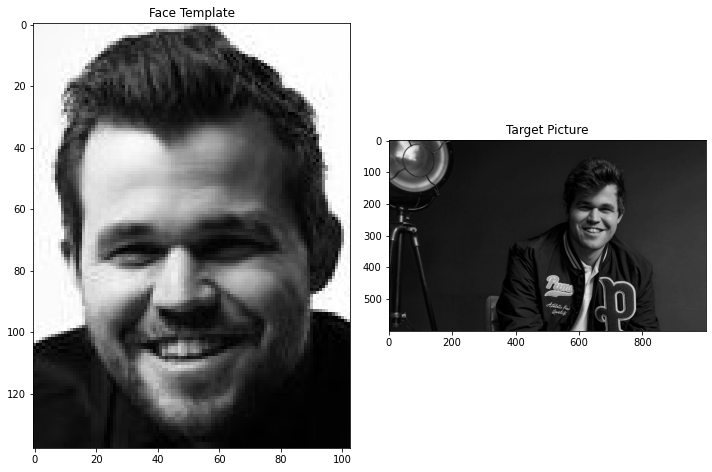

In [15]:
img = cv2.imread('../input/magnus/magnus.jpg', 0)
img2 = img.copy()
template = cv2.imread('../input/magnus/magnus_template.jpg', 0)
w, h = template.shape[::-1]

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1,2,1)
plt.imshow(template, cmap='gray')
plt.title('Face Template')

ax2 = fig.add_subplot(1,2,2)
plt.imshow(img, cmap='gray')
plt.title('Target Picture');

<font size='4'> Now, we will compare different comparison methods: </font>

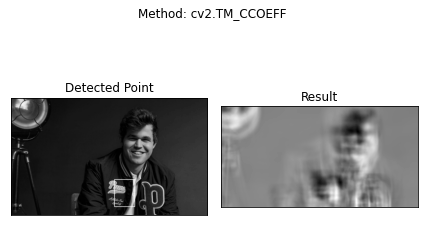

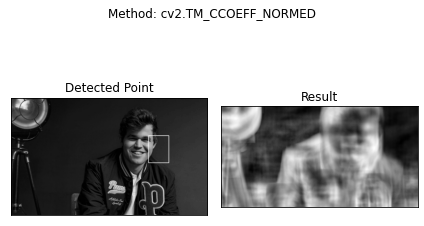

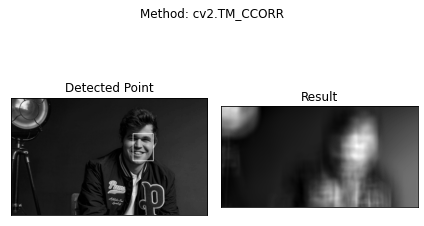

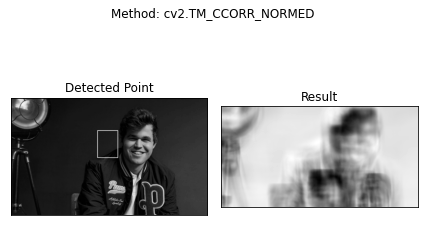

In [16]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(res,cmap = 'gray')
    plt.title('Result'), plt.xticks([]), plt.yticks([])
    plt.suptitle(f'Method: {meth}')
    plt.show()

<font size='4'> Note that, however, `cv2.minMaxLoc` method won't work out if there are multiple occurences of a feature in an image. In that case, we can set a threshold and try to identify those objects. </font>

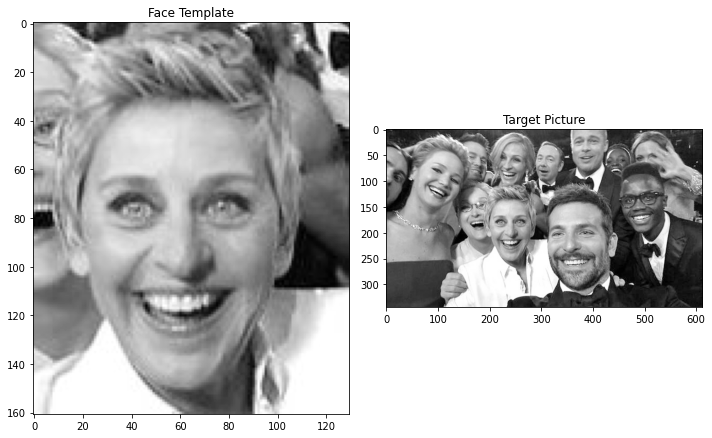

In [17]:
img = cv2.imread('../input/face-detection/selfie.jpg', 0)
template = cv2.imread('../input/face-detection/face_template.jpg', 0)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1,2,1)
plt.imshow(template, cmap='gray')
plt.title('Face Template')

ax2 = fig.add_subplot(1,2,2)
plt.imshow(img, cmap='gray')
plt.title('Target Picture');
    

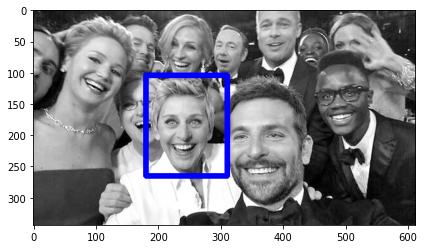

In [18]:
h, w = template.shape

res = cv2.matchTemplate(img_gray, template,method=cv2.TM_CCOEFF_NORMED)

threshold = 0.8
above = np.where( res >= threshold)
for pt in zip(*above[::-1]):
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
    
plt.imshow(img);   

<font size='4'> Now, we will use `haarcascades.xml` from opencv to detect multiple faces at once: </font>

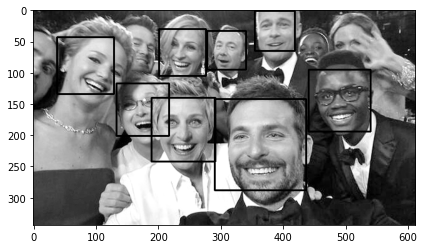

In [19]:
plt.imshow(img_gray, cmap='gray')

path = '../input/frontal-face/haarcascade_frontalface_default.xml'
cascade = cv2.CascadeClassifier(path)

faces = cascade.detectMultiScale(img_gray, scaleFactor=1.05, minNeighbors=5, minSize=(40,40))
for (x, y, w, h) in faces:
    cv2.rectangle(img_gray, (x,y), (x+w, y+h), (0, 255, 0), 2)
    
plt.imshow(img_gray, cmap='gray')    

**<font size='4'> Don't forget to give an upvote if you find this notebook helpful. </font>**

### To Be Continued..

**References:**

[1] https://github.com/opencv/opencv/tree/master/data/haarcascades

[2] https://www.kaggle.com/code/nuritasthedataist/clustering-customer-personality-analysis/edit